# buisnes understanding

### buisness vraag:
**wat hebben de apps zonder rating met elkaar gemeen**
***
Met het beantwoorden van deze vraag kunnen we erachter komen wat er bijdraagt aan een app
zonder ratings. Als er een app er er worden geen ratings gegeven door de gebruikers wordt de app
ook niet snel aageraden en snel als onsuccesvol beschouwd. Dit willen we voorkomen door te analyseren
wat de factoren zijn bij onsuccesvolle apps zonder rating.


# Data Understanding

* de dataset die er wordt toegeleverd is een bestand in csv formaat.
* de databron is makkelijk te benaderen vanuit python met behulp van pandas
* de databse bevat 17007 rijen en 18 kolommen
* de volgende kollommen staan in de database
    * `URL`: de url naar de game in de appstore
    * `ID`: unieke id voor de game
    * `name`: naam van de app
    * `subtitle`: alternative naam voor de app
    * `icon url`: url naar de icon van de app
    * `Avegage user rating`: de gemiddelde score van de app op de appstore
    * `Uer rating count`: het aantal ratings dat de app heeft
    * `price`: de aankoop prijs van de app
    * `In-app Purchases`: lijst met prijzen van in-app aankopen
    * `Description`: een omschrijving van de app
    * `Developper`: de uitgever van de app
    * `Age rating`: de aanbevolen minimumleeftijd (4+, 12+ ect.)
    * `Languages`: talen waarin de app beschikbaar is
    * `Size`: de groote van de app in bytes
    * `primary` Genre: de genre van de app (entertainment, strategie, ect.)
    * `Genres`: een lijst met overige genres waar binnen de app valt
    * `Original` realease date: de datum waarop de app werd uitgegeven
    * `current version release date`: de datum van de laatste update



In [6]:
#imports
import pandas as pd
import seaborn as sns

In [19]:
data = pd.read_csv('appstore_games.csv')
data.dtypes

URL                              object
ID                                int64
Name                             object
Subtitle                         object
Icon URL                         object
Average User Rating             float64
User Rating Count               float64
Price                           float64
In-app Purchases                 object
Description                      object
Developer                        object
Age Rating                       object
Languages                        object
Size                            float64
Primary Genre                    object
Genres                           object
Original Release Date            object
Current Version Release Date     object
dtype: object

In [20]:
data.isna().sum()

URL                                 0
ID                                  0
Name                                0
Subtitle                        11746
Icon URL                            0
Average User Rating              9446
User Rating Count                9446
Price                              24
In-app Purchases                 9324
Description                         0
Developer                           0
Age Rating                          0
Languages                          60
Size                                1
Primary Genre                       0
Genres                              0
Original Release Date               0
Current Version Release Date        0
dtype: int64

In [21]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,17007.0,1.059614e+09,2.999676e+08,284921427.0,899654330.0,1.112286e+09,1.286983e+09,1.475077e+09
Average User Rating,7561.0,4.060905e+00,7.514275e-01,1.0,3.5,4.500000e+00,4.500000e+00,5.000000e+00
User Rating Count,7561.0,3.306531e+03,4.232256e+04,5.0,12.0,4.600000e+01,3.090000e+02,3.032734e+06
Price,16983.0,8.134187e-01,7.835732e+00,0.0,0.0,0.000000e+00,0.000000e+00,1.799900e+02
Size,17006.0,1.157064e+08,2.036477e+08,51328.0,22950144.0,5.676895e+07,1.330271e+08,4.005591e+09


# Data Preparation

meer dan de helft van de apps heeft geen rating zoals te zien in de data understanding. 9446 nul waardes op de `average user rating` en `user rating count` van de 17007 totale waardes. alleen in de de rijen waarbij deze kollomen nul waardes hebben zijn we geintreseerd aangezien dit de apps zijn zonder rating.

In [49]:
data_apps_zonder_rating = data[data['Average User Rating'].isna()]
#drop de id kolomn, deze is niet nodig
data_apps_zonder_rating = data_apps_zonder_rating.drop(['ID'], axis=1)
data_apps_zonder_rating = data_apps_zonder_rating.drop(['Average User Rating'], axis=1)
data_apps_zonder_rating = data_apps_zonder_rating.drop(['User Rating Count'], axis=1)
data_apps_zonder_rating.shape

(9446, 15)

In [39]:
data_apps_zonder_rating.isna().sum()

URL                                0
Name                               0
Subtitle                        6909
Icon URL                           0
Price                             24
In-app Purchases                6397
Description                        0
Developer                          0
Age Rating                         0
Languages                         36
Size                               1
Primary Genre                      0
Genres                             0
Original Release Date              0
Current Version Release Date       0
description_length                 0
dtype: int64

### nul waardes verwijderen en opschonen


In [58]:
data_apps_zonder_rating['In-app Purchases'].fillna('0', inplace=True)
data_apps_zonder_rating['Subtitle'].fillna('0', inplace=True)
data_apps_zonder_rating = data_apps_zonder_rating.dropna(subset=['Size', 'Languages', 'Price'])
data_apps_zonder_rating.isna().sum()
# data_apps_zonder_rating.head()

URL                             0
Name                            0
Subtitle                        0
Icon URL                        0
Price                           0
In-app Purchases                0
Description                     0
Developer                       0
Age Rating                      0
Languages                       0
Size                            0
Primary Genre                   0
Genres                          0
Original Release Date           0
Current Version Release Date    0
dtype: int64

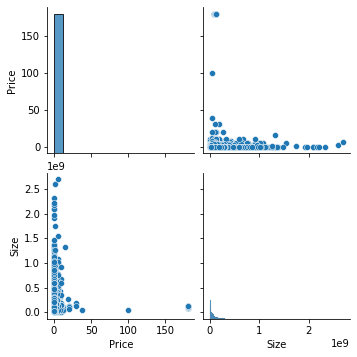

In [35]:
sns.pairplot(data=data_apps_zonder_rating)

### weinig relevante plots
we zien hierboven dat er weinig relevante plots te vinden zijn, dit komt door dat veel van de belangrijke waardes worden opgeslagen als string (type object) en deze kunnen niet geanalyseerd worden voordat we er numerieke waardes aangeven. bijvoorbeeld description lengte in plaats van description zelf.

In [66]:
data_apps_zonder_rating['description_length'] = data_apps_zonder_rating['Description'].str.count(' ') + 1
data_apps_zonder_rating.head()

,URL,Name,Subtitle,Icon URL,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date,description_length
10,https://apps.apple.com/us/app/quaddraxx/id2875...,Quaddraxx,0,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,0.00,0,Quaddraxx-Logic \u2013 Challenge your brain!\n...,H2F Informationssysteme GmbH,4+,EN,3089867.0,Games,"Games, Entertainment, Strategy, Puzzle",11/08/2008,30/09/2008,110
22,https://apps.apple.com/us/app/ane-rouge/id2918...,Ane Rouge,0,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,0.00,0,Your Goal is to make leave the red square towa...,Jean-Francois Pautex,4+,"EN, FR",1190912.0,Games,"Games, Puzzle, Education, Strategy",27/09/2008,8/03/2017,99
23,https://apps.apple.com/us/app/neiscat/id291929815,Neiscat,0,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,0.99,0,"Neiscat is an original strategy game, where yo...",Frederic Bronner,4+,"EN, FR",8806400.0,Games,"Games, Board, Entertainment, Strategy",29/09/2008,23/12/2018,239
56,https://apps.apple.com/us/app/shogi-kifu/id302...,Shogi Kifu,0,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,3.99,0,This application is to record Shogi (Japanese ...,Yoshikazu Kakinoki,4+,"EN, JA",29797376.0,Games,"Games, Strategy, Board",14/07/2011,13/10/2018,48
57,https://apps.apple.com/us/app/shogi-kifu/id302...,Shogi Kifu,0,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,3.99,0,This application is to record Shogi (Japanese ...,Yoshikazu Kakinoki,4+,"EN, JA",29797376.0,Games,"Games, Strategy, Board",14/07/2011,13/10/2018,48


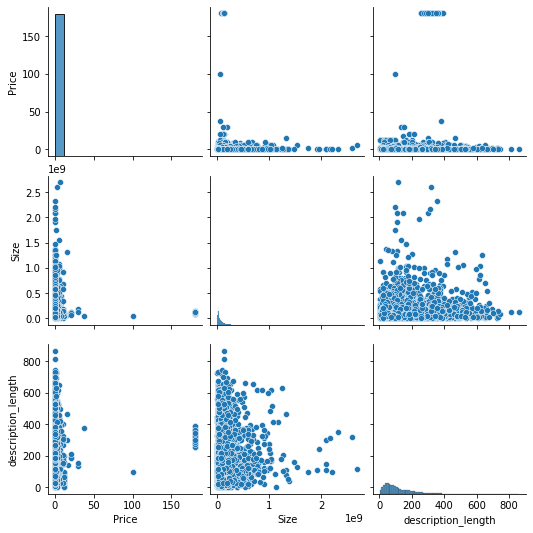

In [67]:
sns.pairplot(data=data_apps_zonder_rating)